# Seattle Library data analysis
# Module 1, assignment 4

In [1]:
import urllib.request
import pandas as pd

## Fragestellung 2: Wieviele Ausleihen im Jahr 2019 waren Neuerscheinungen aus den Jahren 2018-2019?
## Checkout-Daten über API holen und in Datei abspeichern

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$select=SUM(checkouts),publicationyear&$group=publicationyear&$where=checkoutyear=2019&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url,checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f6764ae13d0>)

## Daten in DataFrame laden und analysieren

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,SUM_checkouts,publicationyear
0,1,07/2018.
1,1,"1406 H., 1986."
2,2,1431 [2010]
3,1,1812.
4,2,1824.
...,...,...
3266,8,Tāhśāś 2005
3267,1,"Ṭeqemt 2007 ʻĀmata meḥerat, October 2014."
3268,1,[Vorwort 1956]
3269,1,Xin chao she :. 1992.


In [5]:
checkouts_df["newpublication"] = checkouts_df["publicationyear"].str.contains("2018|2019")

In [6]:
checkouts_df

,SUM_checkouts,publicationyear,newpublication
0,1,07/2018.,True
1,1,"1406 H., 1986.",False
2,2,1431 [2010],False
3,1,1812.,False
4,2,1824.,False
...,...,...,...
3266,8,Tāhśāś 2005,False
3267,1,"Ṭeqemt 2007 ʻĀmata meḥerat, October 2014.",False
3268,1,[Vorwort 1956],False
3269,1,Xin chao she :. 1992.,False


In [7]:
checkouts_df["newpublication"].unique()

array([True, False, nan], dtype=object)

In [8]:
checkouts_df = checkouts_df.groupby(["newpublication"]).sum()

In [9]:
checkouts_df

,SUM_checkouts
newpublication,
False,6058108
True,3090332


In [10]:
%matplotlib inline

In [11]:
checkouts_df = checkouts_df.rename(index={0:'Andere',1:'Neuerscheinungen 2018-2019'})

<AxesSubplot:ylabel='Ausleihen 2019'>

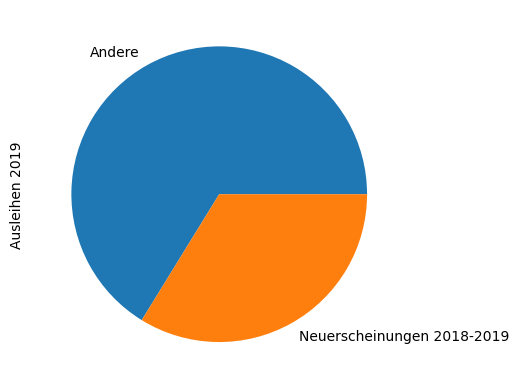

In [12]:
checkouts_df["SUM_checkouts"].plot(kind="pie",label="Ausleihen 2019")